# Random Forest Regresyon Modeli Kurarak Bir Tahmin İşlemi Yapacağız. Örnek olarak, bir kullanıcının yaşını, gelirini ve harcadığı miktarı içeren bir veri seti oluşturalım.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [31]:
# Veri setini oluşturalım.

age = np.random.randint(18, 65, size=100)
income = np.random.randint(2000, 5000, size=100)
spending = np.random.randint(1000, 2000, size=100)

data = pd.DataFrame({
    'Yaş': age,
    'Gelir': income,
    'Harcama': spending
})
data.head()

,Yaş,Gelir,Harcama
0,22,2064,1385
1,45,2695,1607
2,47,2088,1772
3,50,3116,1163
4,46,4108,1728


# Veri Analizi

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Yaş,100.0,40.09,13.583334,18.0,27.75,38.5,51.00,64.0
Gelir,100.0,3429.39,901.380119,2006.0,2603.00,3345.0,4143.75,4988.0
Harcama,100.0,1543.23,284.072187,1014.0,1322.75,1594.0,1795.50,1979.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Yaş      100 non-null    int32
 1   Gelir    100 non-null    int32
 2   Harcama  100 non-null    int32
dtypes: int32(3)
memory usage: 1.3 KB


In [34]:
# Değişkenler arasındaki korelasyonun gözlenmesi
data.corr()

,Yaş,Gelir,Harcama
Yaş,1.000000,0.116667,-0.042698
Gelir,0.116667,1.000000,-0.177113
Harcama,-0.042698,-0.177113,1.000000


In [35]:
# Varyansın Gözlenmesi
data.var()

Yaş           184.506970
Gelir      812486.119091
Harcama     80697.007172
dtype: float64

In [36]:
# Eksik Gözlem Analizi
data.isnull().any()

Yaş        False
Gelir      False
Harcama    False
dtype: bool

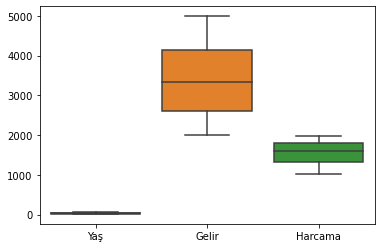

In [37]:
# Aykırı Gözlem Analizi
sns.boxplot(data=data);

# Model

In [38]:
# Bağımlı ve bağımsız değişkenleri oluşturalım.

X = data[['Yaş', 'Gelir']]
y = data['Harcama']

In [39]:
# Eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# modeli oluşturalım ve eğitelim.
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
# Tahmin yapalım.
predict = model.predict(X_test)

In [42]:
# Modeli Değerlendirelim.
r2 = r2_score(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)

print('R^2: ', r2)
print('MSE: ', mse)
print('RMSE: ', rmse)

R^2:  -0.2931663725220708
MSE:  88478.63395000002
RMSE:  297.4535828494927


# Model Tuning

In [43]:
params = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200, 300],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print('Best Parameters: ', best_params)

Best Parameters:  {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


## Elde ettiğimiz hiperparametreleri kullanarak modelimizi tekrar kuralım.

In [44]:
model = RandomForestRegressor(**best_params).fit(X_train, y_train)

In [45]:
predict = model.predict(X_test)

In [46]:
r2 = r2_score(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
print('R^2: ', r2)
print('MSE: ', mse)
print('RMSE: ', rmse)

R^2:  -0.2689623762561486
MSE:  86822.59295539618
RMSE:  294.65673750212494


# Tahmin

In [48]:
data.head(1)

,Yaş,Gelir,Harcama
0,22,2064,1385


In [49]:
yas = int(input('Lütfen Yaşınızı Giriniz: '))
gelir = int(input('Lütfen Gelirinizi Giriniz: '))

user_pred = model.predict([[yas, gelir]])

print('Tahmini Harcamanız: ', int(user_pred))

Lütfen Yaşınızı Giriniz:  23
Lütfen Gelirinizi Giriniz:  10000


Tahmini Harcamanız:  1612


C:\Users\murat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Sonuç

### Üzerinde çalıştığımız veri setini kendimiz hazırladık. Bu yüzden gerçek hayat senaryosu değildir. Çıkan sonuçlar da bunu doğruluyor. Amacımız Random Forest Regresyon modelini, hiperparametreleri pratik etmektir. 